Kernel=linear | Best params={'clf__C': 0.1} | Test Accuracy=0.856
Kernel=poly | Best params={'clf__C': 10, 'clf__coef0': 1, 'clf__degree': 3, 'clf__gamma': 'scale'} | Test Accuracy=0.992
Kernel=rbf | Best params={'clf__C': 1, 'clf__gamma': 1} | Test Accuracy=0.984


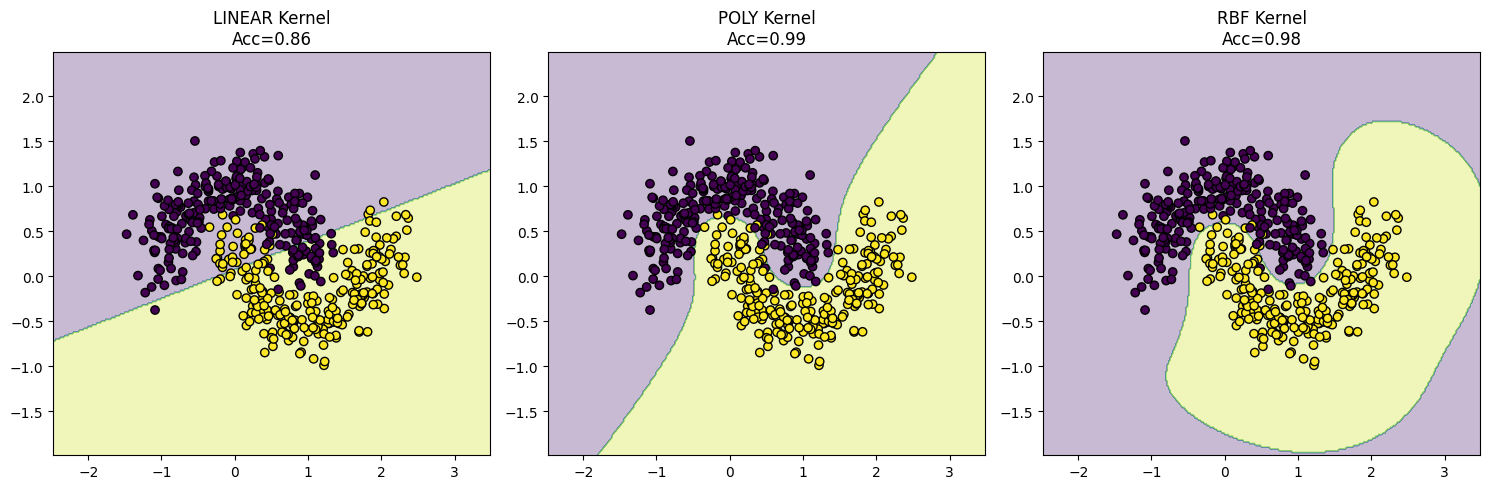

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Create dataset (non-linear, 2 classes)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 2. Helper function to run SVM and plot decision boundary
def run_model(kernel, param_grid, ax):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel=kernel, probability=True))
    ])
    gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Kernel={kernel} | Best params={gs.best_params_} | Test Accuracy={acc:.3f}")

    # Plot decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = gs.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    ax.set_title(f"{kernel.upper()} Kernel\nAcc={acc:.2f}")

    return gs

# 3. Run for Linear, Polynomial, RBF
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Linear SVM
run_model("linear", {"clf__C": [0.01, 0.1, 1, 10, 100]}, axes[0])

# Polynomial SVM
run_model("poly", {
    "clf__C": [0.1, 1, 10],
    "clf__degree": [2, 3, 4],
    "clf__coef0": [0, 1],
    "clf__gamma": ["scale", "auto"]
}, axes[1])

# RBF SVM
run_model("rbf", {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", "auto", 0.01, 0.1, 1]
}, axes[2])

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load built-in dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Model Accuracy:", accuracy)
print("\nTop 10 Important Features:")
print(importances.head(10))


Model Accuracy: 0.9707602339181286

Top 10 Important Features:
mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
worst perimeter         0.074292
mean perimeter          0.060092
mean area               0.053810
worst concavity         0.041080
mean radius             0.032312
dtype: float64


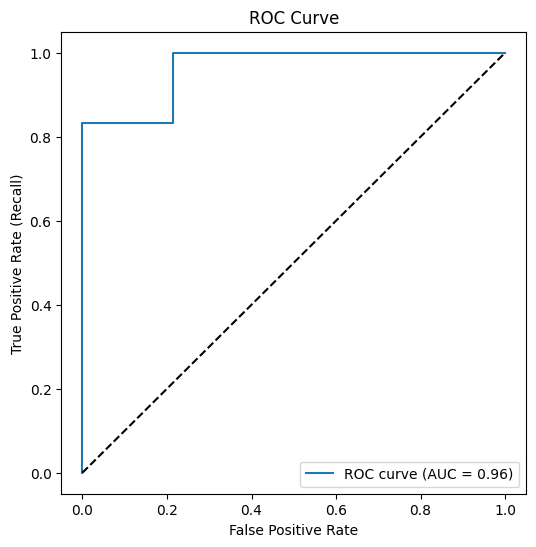

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example probabilities (normally you get this from model.predict_proba)
y_true = [1]*50 + [0]*30 + [1]*10 + [0]*110
y_scores = [0.9]*50 + [0.7]*30 + [0.6]*10 + [0.2]*110

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


✅ Optimal K is 13 with accuracy = 0.9332


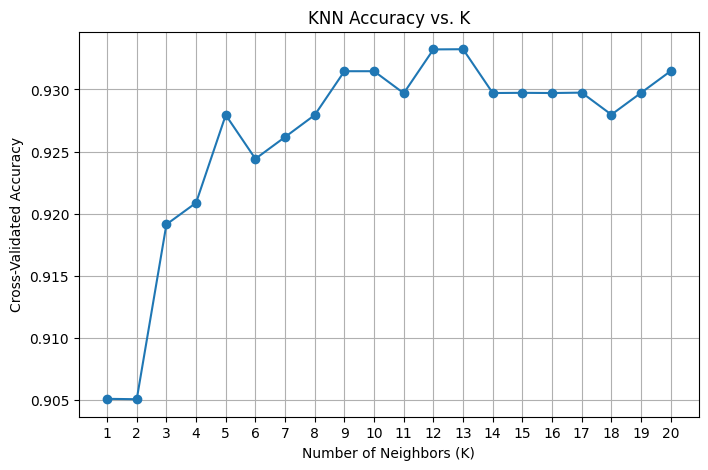

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load built-in dataset
X, y = load_breast_cancer(return_X_y=True)

# Store mean accuracy for each K
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find optimal K
optimal_k = k_values[np.argmax(cv_scores)]
print(f"✅ Optimal K is {optimal_k} with accuracy = {max(cv_scores):.4f}")

# Plot accuracy vs. K
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy vs. K")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [9]:
# If needed:
# pip install pgmpy

# --- Imports (handle new/old pgmpy) ---
try:
    from pgmpy.models import DiscreteBayesianNetwork as BN  # new name
except ImportError:
    try:
        from pgmpy.models import BayesianModel as BN        # older fallback
    except ImportError:
        raise ImportError("pgmpy not found. Install with: pip install pgmpy")

from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# --- 1) Structure: Income -> LoanApproval <- CreditScore ---
model = BN([("Income", "LoanApproval"),
            ("CreditScore", "LoanApproval")])

# --- 2) CPDs (with readable state names) ---
state_names = {
    "Income": ["High", "Low"],
    "CreditScore": ["Good", "Bad"],
    "LoanApproval": ["Approved", "NotApproved"],
}

# Priors
cpd_income = TabularCPD(
    variable="Income", variable_card=2,
    values=[[0.60], [0.40]],
    state_names={"Income": state_names["Income"]}
)

cpd_credit = TabularCPD(
    variable="CreditScore", variable_card=2,
    values=[[0.70], [0.30]],
    state_names={"CreditScore": state_names["CreditScore"]}
)

# Conditional: P(LoanApproval | Income, CreditScore)
# Column order corresponds to:
#   (Income=High, Credit=Good),
#   (Income=Low , Credit=Good),
#   (Income=High, Credit=Bad ),
#   (Income=Low , Credit=Bad )
cpd_loan = TabularCPD(
    variable="LoanApproval", variable_card=2,
    values=[
        [0.90, 0.60, 0.70, 0.20],  # Approved
        [0.10, 0.40, 0.30, 0.80],  # NotApproved
    ],
    evidence=["Income", "CreditScore"],
    evidence_card=[2, 2],
    state_names={
        "LoanApproval": state_names["LoanApproval"],
        "Income": state_names["Income"],
        "CreditScore": state_names["CreditScore"],
    }
)

# --- 3) Add CPDs & validate ---
model.add_cpds(cpd_income, cpd_credit, cpd_loan)
if not model.check_model():
    raise ValueError("Model/CPDs are inconsistent.")

# --- 4) Inference: P(LoanApproval | Income=High, CreditScore=Bad) ---
infer = VariableElimination(model)
res = infer.query(
    variables=["LoanApproval"],
    evidence={"Income": "High", "CreditScore": "Bad"}
)
print(res)

# Extract numeric probabilities (order follows state_names for LoanApproval)
approved_prob = float(res.values[0])      # 'Approved'
notapproved_prob = float(res.values[1])   # 'NotApproved'
print(f"P(Approved | Income=High, Credit=Bad) = {approved_prob:.3f}")
print(f"P(NotApproved | Income=High, Credit=Bad) = {notapproved_prob:.3f}")


+---------------------------+---------------------+
| LoanApproval              |   phi(LoanApproval) |
+===========================+=====================+
| LoanApproval(Approved)    |              0.6000 |
+---------------------------+---------------------+
| LoanApproval(NotApproved) |              0.4000 |
+---------------------------+---------------------+
P(Approved | Income=High, Credit=Bad) = 0.600
P(NotApproved | Income=High, Credit=Bad) = 0.400


In [8]:
# Loan Approval Prediction with SVM, Random Forest, and KNN

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# -----------------------------
# 1. Create a synthetic dataset (loan approval-like)
# -----------------------------
# Features = [Income, Credit Score, Previous Defaults]
X, y = make_classification(
    n_samples=1000,
    n_features=5,        # pretend features like income, credit score, etc.
    n_informative=3,
    n_redundant=0,
    random_state=42
)

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 2. Train Models
# -----------------------------
# Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# -----------------------------
# 4. Evaluation
# -----------------------------
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    print(f"🔹 {name} Performance:")
    print(f"   Accuracy: {acc:.3f}")
    print(f"   Precision: {prec:.3f}")
    print(f"   Recall: {rec:.3f}\n")

evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("KNN", y_test, y_pred_knn)

# -----------------------------
# 5. Detailed Report
# -----------------------------
print("📊 Classification Report for Random Forest (best performer usually):")
print(classification_report(y_test, y_pred_rf))


🔹 SVM Performance:
   Accuracy: 0.947
   Precision: 0.974
   Recall: 0.926

🔹 Random Forest Performance:
   Accuracy: 0.957
   Precision: 0.975
   Recall: 0.944

🔹 KNN Performance:
   Accuracy: 0.943
   Precision: 0.962
   Recall: 0.932

📊 Classification Report for Random Forest (best performer usually):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       138
           1       0.97      0.94      0.96       162

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

